## Import libraries and load data

In [7]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## EDA and Data Cleaning

In [8]:
boston = pd.concat([y, X], axis=1)

In [9]:
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  TAX      506 non-null    float64
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [13]:
boston.shape

(506, 14)

In [14]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

## Using scikit-learn linear regression 
picked a few predictors to predict target variable, MEDV

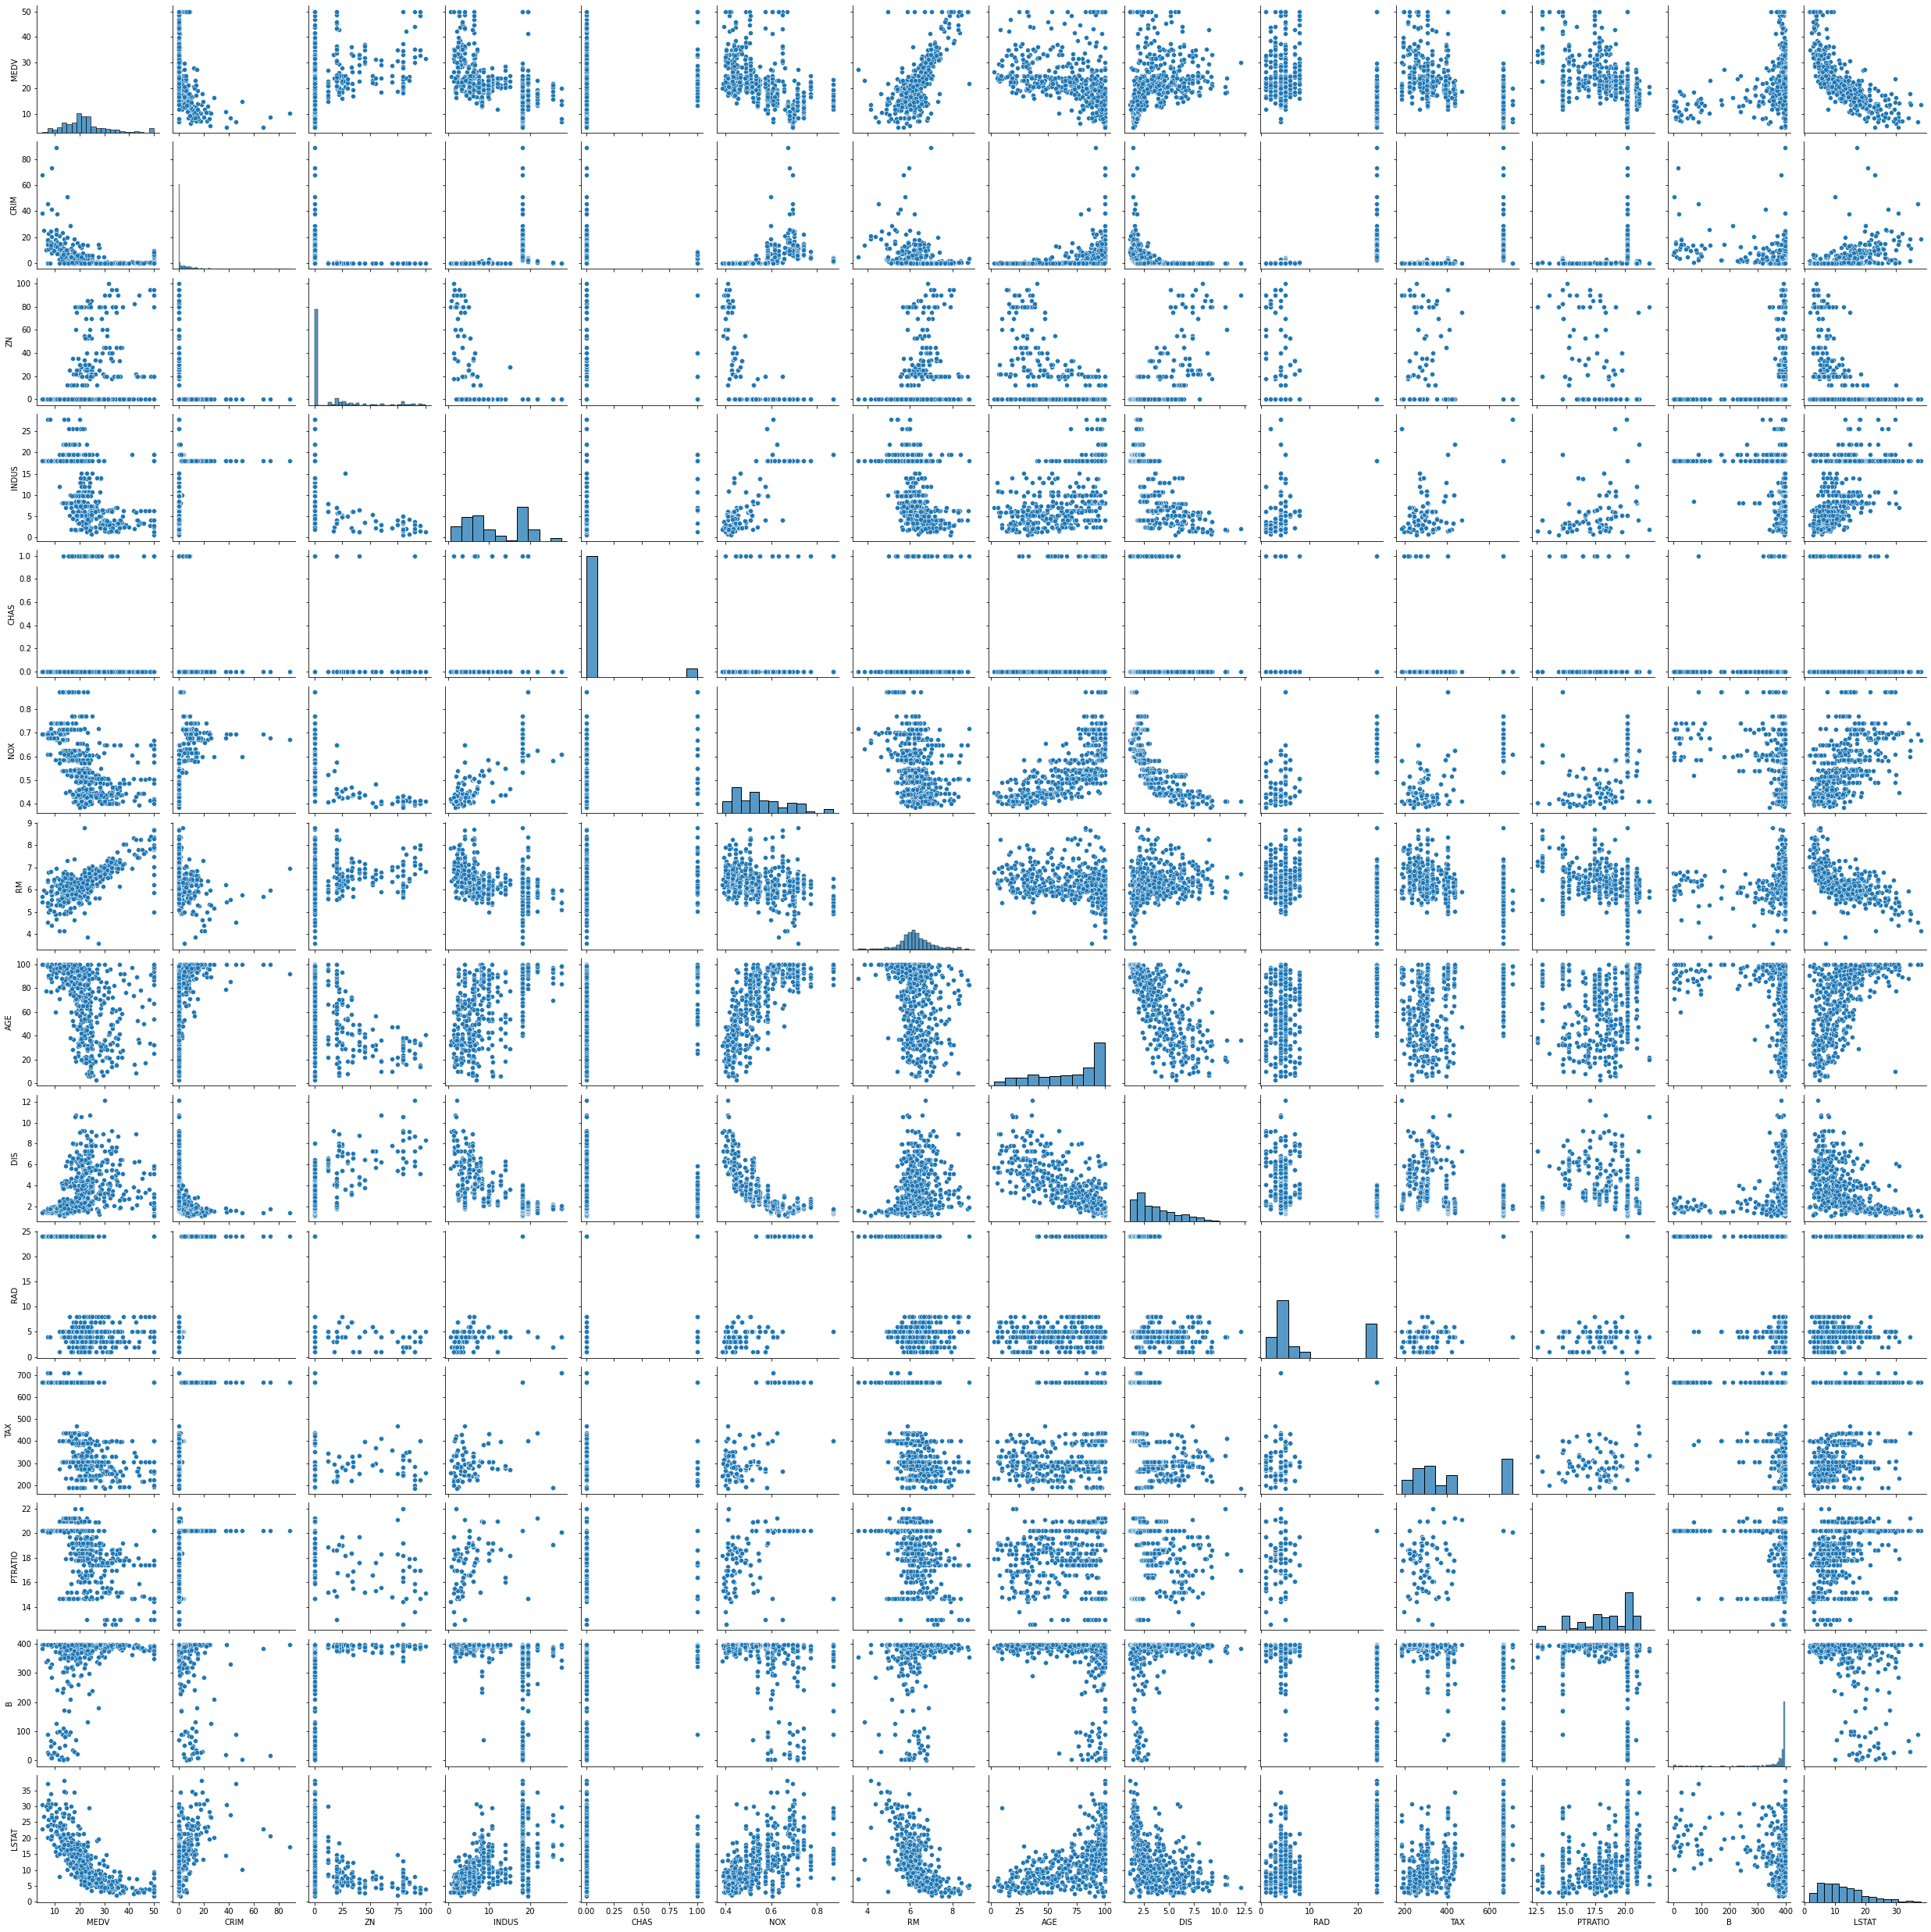

In [16]:
sns.pairplot(boston)

In [17]:
boston.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [18]:
boston.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

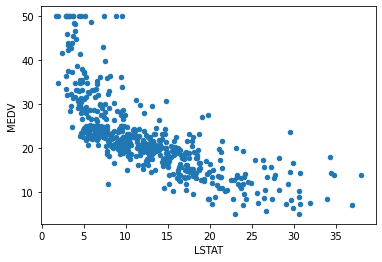

In [19]:
boston.plot(x='LSTAT', y='MEDV', kind='scatter')
#as LSTAT (% lower status of the population) increases, the median value of owner-occupied homes decreases

# Model selection

**M1: For my first model, I chose RM, PTRATIO, and LSTAT as my features.**
My code for the following block of code was:

feature_cols = boston.columns.drop(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD','TAX', 'B'])

X = boston[feature_cols]

y = boston.MEDV



**M2: for my second model, I chose RM and LSTAT as my features.** 
My code for the following block of code was: 

feature_cols = boston.columns.drop(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD','TAX', 'B', 'PTRATIO'])

X = boston[feature_cols]

y = boston.MEDV



**M3: For my third model, I chose RM, PTRATIO, TAX, NOX and LSTAT as my features.** My code for the following block of code was: 

feature_cols = boston.columns.drop(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B'])
X = boston[feature_cols]
y = boston.MEDV

In [21]:
#Chose features
feature_cols = boston.columns.drop(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B'])
X = boston[feature_cols]
y = boston.MEDV

In [22]:
# Import 
from sklearn.linear_model import LinearRegression

# Instantiate 
lr = LinearRegression()

# Train model
lr.fit(X, y)

# Test model
lr.predict(X)

array([31.02622216, 26.02578914, 32.28949288, 31.2709073 , 30.66470698,
       27.43937605, 24.49453763, 21.60185155, 13.30124938, 21.93736387,
       21.84090654, 24.02741181, 22.15986597, 21.31841206, 20.91352279,
       20.67737184, 22.16088974, 18.04698223, 17.20496498, 18.66978492,
       12.69254537, 18.3856245 , 16.55862283, 14.42287294, 16.8643944 ,
       15.25972756, 17.1592227 , 16.8998846 , 21.37353992, 22.63748234,
       12.49598116, 19.30298923, 10.82556432, 14.73470109, 15.47320611,
       22.15932483, 20.80345945, 22.26960258, 22.06788059, 29.00087628,
       32.23235847, 29.89530833, 26.61397817, 25.92696975, 24.13657816,
       22.00454074, 20.35529237, 18.96526483,  9.58783166, 18.40455829,
       22.50785591, 25.37498814, 29.43192554, 25.3778244 , 17.22811889,
       32.1629309 , 28.03110354, 33.05412936, 24.24328141, 21.96922026,
       18.99464655, 19.33087264, 25.74052936, 25.64966335, 29.13664925,
       29.22529088, 23.91096896, 22.98070734, 18.98434442, 22.64

In [23]:
y_pred = lr.predict(X)

In [24]:
#score by MSE
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))

#MSE is the average squared distance b/w prediction and correct answer. lower is be better

27.037955143787638


In [25]:
#score by R2
lr.score(X,y)
#R2 close to 0 is poor, R2 close to 1 is good

0.6797192928405023

# SUMMARY OF SCORING

**M1:**
    
    MSE = 27.13040575849706
    
* this means the average squared distance between prediction and correct answer is ~27. lower would be better
    
    R2 = 0.6746212310778149
    
* R close to 0 is poor, R2 close to 1 is good
    
**M2:**
    
    MSE= 30.51246877729947
        
* avg squared distance bw pred and correct answer is ~30, worse than M1
        
    R2= 0.6385616062603403
        
* correlation coefficient is closer to 0 than M1, worse than M1


**M3:**
    
    MSE: 27.037955143787638
    
* avg squared distance bw pred and correct answer is ~27. slightly better than M1, significantly better than M2
   
   R2: 0.6797192928405023
   
* correlation coeffient is significantly closer to 1 than M2 and slightly closer to 1 than M1.




### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)


In [28]:
from sklearn.model_selection import train_test_split

#make train test split with 30% testing, 70% training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
#check that the data was split correctly
X_train.head()

,NOX,RM,TAX,PTRATIO,LSTAT
13,0.538,5.949,307.0,21.0,8.26
61,0.453,5.966,284.0,19.7,14.44
377,0.671,6.794,666.0,20.2,21.24
39,0.428,6.595,252.0,18.3,4.32
365,0.718,3.561,666.0,20.2,7.12


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 13 to 37
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NOX      354 non-null    float64
 1   RM       354 non-null    float64
 2   TAX      354 non-null    float64
 3   PTRATIO  354 non-null    float64
 4   LSTAT    354 non-null    float64
dtypes: float64(5)
memory usage: 16.6 KB


In [32]:
#score with R2
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6524738956511256
0.716432958281466


In [33]:
y_pred = lr.predict(X_test)

In [34]:
#score with MSE
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

28.215318866349616
25.99019176768711


# SUMMARY OF SCORING with 70/30 train test split

**M1:** 
    
   MSE: 
* train: 28.52576850189171
* test: 23.991230150264755
   
R2: 
   
* train: 0.6507406702994561
* test: 0.7228623473287099

**M2:**

MSE: 
* train: 31.67053267248167
* test: 28.934491341086556

R2:

* train: 0.6099162694401526
* test: 0.6843090583339466
        
**M3:**

MSE: 

* train: 28.215318866349616
* test: 25.99019176768711

R2: 

* train: 0.6524738956511256
* test: 0.716432958281466




In [36]:
#make df with training data
training=pd.concat([X_train, y_train], axis=1)
training.head()

,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
13,0.538,5.949,307.0,21.0,8.26,20.4
61,0.453,5.966,284.0,19.7,14.44,16.0
377,0.671,6.794,666.0,20.2,21.24,13.3
39,0.428,6.595,252.0,18.3,4.32,30.8
365,0.718,3.561,666.0,20.2,7.12,27.5


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

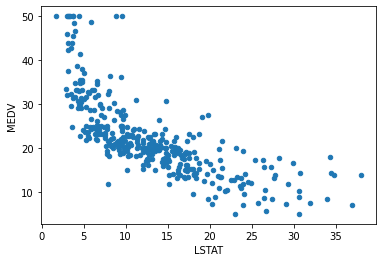

In [37]:
#plot LSTAT training data to visualize
training.plot(x='LSTAT', y='MEDV', kind='scatter')

In [38]:
#make second train test split with 90% training, 10% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=1)

In [39]:
#check that the data was split correctly
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 242 to 37
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NOX      455 non-null    float64
 1   RM       455 non-null    float64
 2   TAX      455 non-null    float64
 3   PTRATIO  455 non-null    float64
 4   LSTAT    455 non-null    float64
dtypes: float64(5)
memory usage: 21.3 KB


In [40]:
lr.fit(X_train1,y_train1)

LinearRegression()

In [41]:
#score with R2
print(lr.score(X_train1,y_train1))
print(lr.score(X_test1,y_test1))



0.671082909329212
0.7442813997758455


In [42]:
y_pred1 = lr.predict(X_test1)

In [43]:
#score with MSE
print(metrics.mean_squared_error(y_train1, lr.predict(X_train1)))
print(metrics.mean_squared_error(y_test1, y_pred1))

27.456388755306982
23.73292966037752


# SUMMARY OF SCORING WITH 90/10 train/test split

**M1:**

MSE: 

* train: 27.590597186690427
* test: 23.354261030701288
    
R2: 
* train: 0.669475143384916
* test: 0.7483614949564783
   
for M1: 
* both training and testing MSE values are lower (better) when 90/10 split is used instead of 70/30
* both training and testing R2 values are closer to 1 (better) when 90/10 split is used instead of 70/30   
* Training scoring is slightly worse than using the entire data set, while testing scoring is improved. 

**M2:**

MSE: 

* train: 30.797944219514267
* test: 28.18757294043823

R2: 

* train:0.63105234626437
* test: 0.6962833160846919
        
For M2:
* both training and testing MSE values are lower (better) when 90/10 split is used instead of 70/30
* both training and testing R2 values are closer to 1 (better) when 90/10 split is used instead of 70/30 

**M3:**

MSE: 

* train: 27.456388755306982
* test: 23.73292966037752

R2: 

* train: 0.671082909329212
* test: 0.7442813997758455

For M3:
* both training and testing MSE values are lower (better) when 90/10 split is used instead of 70/30
* both training and testing R2 values are closer to 1 (better) when 90/10 split is used instead of 70/30 





In [45]:
#make df with training data
training1=pd.concat([X_train1, y_train1], axis=1)
training1.head()

,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
242,0.428,6.358,300.0,16.6,11.22,22.2
5,0.458,6.430,222.0,18.7,5.21,28.7
168,0.605,6.319,403.0,14.7,11.10,23.8
490,0.609,5.093,711.0,20.1,29.68,8.1
62,0.453,6.456,284.0,19.7,6.73,22.2


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

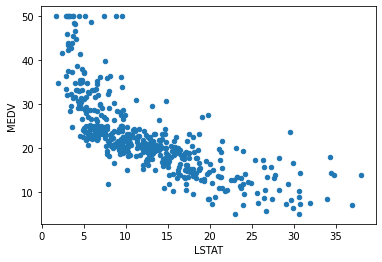

In [46]:
#plot LSTAT training data vs MEDV
training1.plot(x='LSTAT', y='MEDV', kind='scatter')

### Use k-fold cross validation varying the number of folds from 5 to 10

In [48]:
from sklearn import model_selection

In [49]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [50]:
mse_values = []
scores = []
n = 0

print("CROSS VALIDATION each fold")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("SUMMARY OF CROSS VALIDATION")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

CROSS VALIDATION each fold
Model 1
MSE: 34.92375977289624
R2: 0.6767104946715587

Model 2
MSE: 30.257907211342868
R2: 0.6782153977929207

Model 3
MSE: 21.22066707191837
R2: 0.6790212841705752

Model 4
MSE: 30.59068467255835
R2: 0.6789852415518649

Model 5
MSE: 26.11673696655885
R2: 0.6750637175749983

SUMMARY OF CROSS VALIDATION
Mean of MSE for all folds: 28.621951139054936
Mean of R2 for all folds: 0.6775992271523835


In [51]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

28.81595489918012
0.6585747847845165


# Cross validation Summary

**M1:**

CROSS VALIDATION each fold

Model 1
MSE: 30.247344161113638
R2: 0.6780058487945257

Model 2
MSE: 32.16090809360981
R2: 0.6776881873302281

Model 3
MSE: 20.044870588345958
R2: 0.6781058803149862

Model 4
MSE: 42.13324238275491
R2: 0.6744365217312991

Model 5
MSE: 16.252138406552525
R2: 0.677910407057055

SUMMARY OF CROSS VALIDATION

Mean of MSE for all folds: 28.167700726475367

Mean of R2 for all folds: 0.6772293690456188

**M2:**

CROSS VALIDATION each fold

Model 1
MSE: 30.067894056760178
R2: 0.6385064286439689

Model 2
MSE: 33.95281226089228
R2: 0.6349455252085484

Model 3
MSE: 30.486774821704746
R2: 0.6380398351472758

Model 4
MSE: 25.822511923526655
R2: 0.6382980823192839

Model 5
MSE: 37.93621163706523
R2: 0.6354891497237347

SUMMARY OF CROSS VALIDATION

Mean of MSE for all folds: 31.653240939989814

Mean of R2 for all folds: 0.6370558042085623

**M3:**

CROSS VALIDATION each fold

Model 1
MSE: 19.32576002761763
R2: 0.6778409002099929

Model 2
MSE: 17.93943119078426
R2: 0.6795960023429501

Model 3
MSE: 29.240613670354914
R2: 0.6767093229174919

Model 4
MSE: 33.997064716551016
R2: 0.6793403229732904

Model 5
MSE: 40.06395123319349
R2: 0.6779711608090963

SUMMARY OF CROSS VALIDATION

Mean of MSE for all folds: 28.11336416770026

Mean of R2 for all folds: 0.6782915418505644



# M3 is the best model, followed by M1, then M2

# Cross val scores
**M1:**

MSE = 29.04977707299817

R2 = 0.6737641813782586

**M2:**

MSE = 31.02681547002634

R2 = 0.6217501415115751

**M3:**

MSE = 28.432996047531883

R2 = 0.6615993431454446

M1 has the best R2 value, while M3 has the best MSE.